In [1]:
import torch
import random
import os

import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '../../miniproject_dataset'
train_data_name = 'train_data.pkl'
val_data_name = 'val_data.pkl'

In [5]:
noisy_imgs_1, noisy_imgs_2 = torch.load(os.path.join(DATA_PATH, train_data_name))

In [6]:
noisy_imgs_1.shape, noisy_imgs_2.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000, 3, 32, 32]))

In [7]:
# Get random index
rand_idx = random.randint(0, noisy_imgs_1.shape[0])
rand_idx

29379

In [8]:
# Shuffle images
rand_permutation = torch.randperm(noisy_imgs_1.shape[0])
rand_permutation.shape

torch.Size([50000])

In [9]:
noisy_imgs_1_rand = noisy_imgs_1[rand_permutation][:, :, :]
noisy_imgs_1_rand.shape

torch.Size([50000, 3, 32, 32])

In [10]:
rand_img_1, rand_img_2 = noisy_imgs_1_rand[rand_idx], noisy_imgs_1_rand[rand_idx]

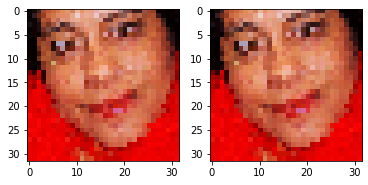

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(rand_img_1.permute(1, 2, 0))
axs[1].imshow(rand_img_2.permute(1, 2, 0))
plt.show()

In [14]:
noisy_imgs, clean_imgs = torch.load(os.path.join(DATA_PATH, val_data_name))
noisy_imgs.shape, clean_imgs.shape

(torch.Size([1000, 3, 32, 32]), torch.Size([1000, 3, 32, 32]))

In [15]:
rand_idx = random.randint(0, noisy_imgs.shape[0])
rand_noisy_img, rand_clean_img = noisy_imgs[rand_idx, :, :, :], clean_imgs[rand_idx, :, :, :]

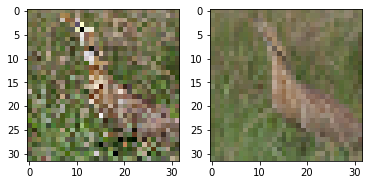

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(rand_noisy_img.permute(1, 2, 0))
axs[1].imshow(rand_clean_img.permute(1, 2, 0))
plt.show()

In [212]:
from augmentation import AugmentedDataset
aug = AugmentedDataset(noisy_imgs_1, noisy_imgs_2)

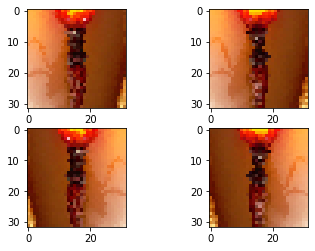

In [213]:
idx = 1
in1, in2 = noisy_imgs_1[idx], noisy_imgs_2[idx]
out1, out2 = aug[idx]

fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0][0].imshow(in1.permute(1, 2, 0))
axs[0][1].imshow(in2.permute(1, 2, 0))
axs[1][0].imshow(out1.permute(1, 2, 0))
axs[1][1].imshow(out2.permute(1, 2, 0))
plt.show()